In [1]:
from textblob import TextBlob
import nltk
nltk.download('punkt')  # Download necessary data


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Load dataset
data_path = r"D:\Kifya_training\Week 1\Technical  Content\Data\raw_analyst_ratings.csv"
df = pd.read_csv(data_path)

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Compute sentiment polarity using VADER
df['sentiment_score'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment into Positive, Neutral, Negative
def categorize_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Preview the updated dataset
print(df[['headline', 'sentiment_score', 'sentiment_category']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                            headline  sentiment_score  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

  sentiment_category  
0            Neutral  
1            Neutral  
2            Neutral  
3            Neutral  
4           Positive  


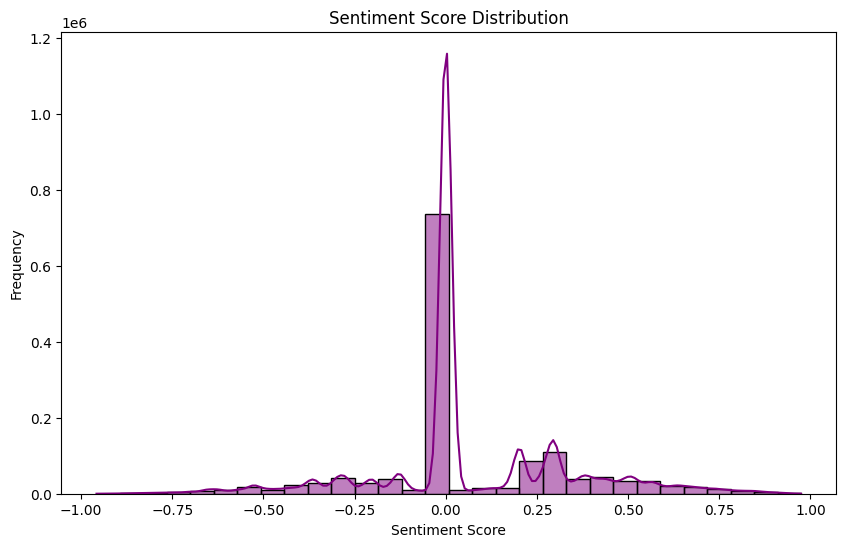

C:\Users\Yoni\AppData\Local\Temp\ipykernel_17308\430665533.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_category', palette='viridis')


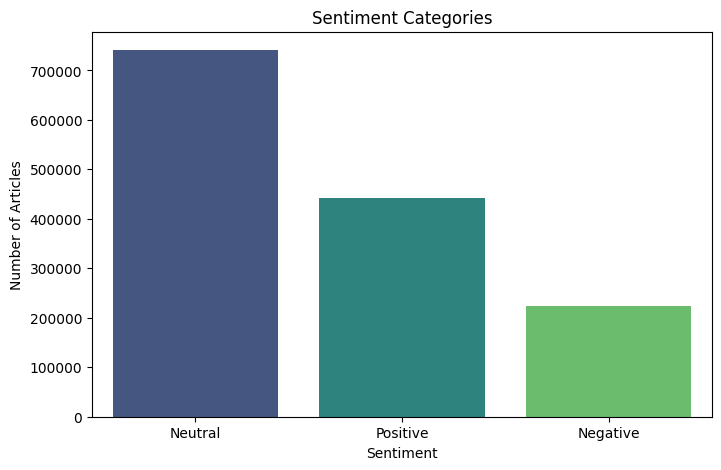

In [3]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], kde=True, bins=30, color='purple')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Plot the count of sentiment categories
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_category', palette='viridis')
plt.title("Sentiment Categories")
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.show()


In [4]:
import nltk

# Download the necessary NLTK data files
nltk.download('stopwords')
nltk.download('punkt')

print("Downloaded stopwords and punkt packages successfully.")


Downloaded stopwords and punkt packages successfully.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
from nltk.corpus import stopwords
from collections import Counter
import nltk
import pandas as pd
import os

# Ensure NLTK data is downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Explicitly set the NLTK data path
nltk_data_path = os.path.expanduser('~/nltk_data')
if nltk_data_path not in nltk.data.path:
    nltk.data.path.append(nltk_data_path)

# Preprocessing: Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word is not stop_words]
    return tokens

# Sample DataFrame
data = {'headline': ["This is the first headline", "This is the second headline"]}
df = pd.DataFrame(data)

# Apply preprocessing
try:
    df['processed_headline'] = df['headline'].apply(preprocess_text)
    
    # Flatten the token lists and count most common words
    all_words = [word for tokens in df['processed_headline'] for word in tokens]
    word_freq = Counter(all_words)
    print("Most Common Keywords:", word_freq.most_common(10))
except LookupError as e:
    print("Error: ", e)
    print("Please ensure that the required NLTK data files are downloaded and available.")

# Display DataFrame to ensure everything is working
print(df)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Most Common Keywords: [('this', 2), ('is', 2), ('the', 2), ('headline', 2), ('first', 1), ('second', 1)]
                      headline                 processed_headline
0   This is the first headline   [this, is, the, first, headline]
1  This is the second headline  [this, is, the, second, headline]


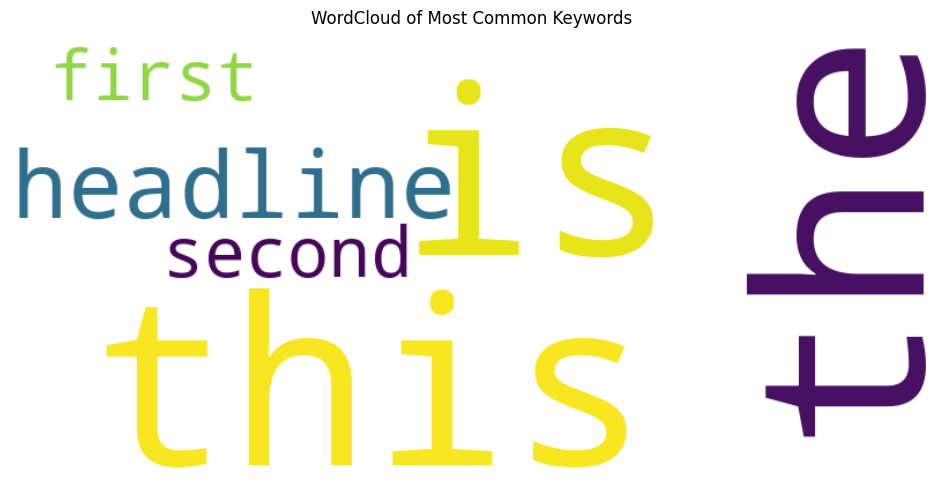

In [8]:
# Word Frequency Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Most Common Keywords")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...


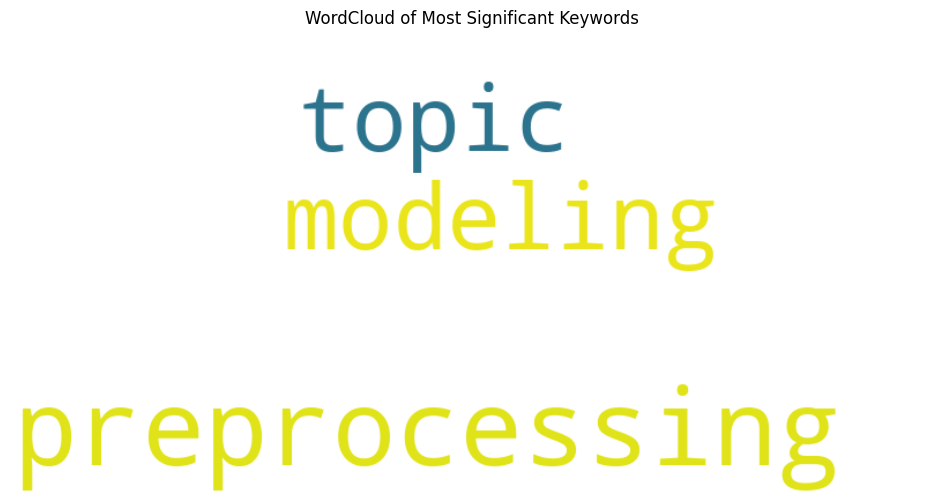

Most Significant Keywords: [('preprocessing', np.float64(1.0)), ('modeling', np.float64(0.7071067811865475)), ('topic', np.float64(0.7071067811865475))]


In [14]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd

# Ensure NLTK data is downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Sample DataFrame
data = {'headline': ["This is the first headline", "This is the second headline", "More news and updates", "Learning about topic modeling", "Text preprocessing with NLTK"]}
df = pd.DataFrame(data)

# Preprocessing: Remove stopwords and punctuation, and apply lemmatization
stop_words = set(stopwords.words('english'))
additional_stopwords = {'headline', 'second', 'first', 'news', 'updates', 'text', 'nltk', 'learning', 'this', 'is', 'the'}  # Add more as needed
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words and word not in additional_stopwords]
    return ' '.join(tokens)

# Apply preprocessing
df['processed_headline'] = df['headline'].apply(preprocess_text)

# Use TF-IDF to identify significant words
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=1, max_df=0.85)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_headline'])
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = dict(zip(feature_names, tfidf_matrix.sum(axis=0).A1))

# Filter out any additional stopwords identified in the TF-IDF scores
filtered_tfidf_scores = {word: score for word, score in tfidf_scores.items() if word not in additional_stopwords}

# Generate word cloud from filtered TF-IDF scores
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_tfidf_scores)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Most Significant Keywords")
plt.show()

# Print the most significant words
significant_words = sorted(filtered_tfidf_scores.items(), key=lambda item: item[1], reverse=True)
print("Most Significant Keywords:", significant_words[:10])
